In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

Importiere die Datensätze

In [92]:
vegis_train = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/vegis_traindata.csv")
vegis_train = vegis_train.drop(columns=["Unnamed: 0", "green pixels", "Image"])

vegis_test = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/TESTDATA_vegis_testdata.csv")
vegis_test = vegis_test.drop(columns=["Unnamed: 0", "green pixels", "Image"])

print("Trainset")
display(vegis_train.head(2))
print("")
print("Testset")
display(vegis_test.head(2))

Trainset


,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label
0,174,111,121,98,76,0,0.747411,0.740759,39,12.664070,Kartoffel
1,97,65,109,84,50,0,0.785250,0.812063,18,7.130874,Kartoffel



Testset


,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label
0,174,76,101,71,36,0,0.73756,0.641460,24,8.030712,Kartoffel
1,165,94,120,102,78,2,0.00000,0.740219,43,6.675791,Kartoffel


Prüfe, ob nans in den Datensätzen vorhanden sind.

In [93]:
print("Trainset")
vegis_train.info()

Trainset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hight               2137 non-null   int64  
 1   Width               2137 non-null   int64  
 2   R                   2137 non-null   int64  
 3   G                   2137 non-null   int64  
 4   B                   2137 non-null   int64  
 5   green onion pixels  2137 non-null   int64  
 6   ratio area          2137 non-null   float64
 7   circularity         2137 non-null   float64
 8   keypoints           2137 non-null   int64  
 9   mean keypoints      2137 non-null   float64
 10  Label               2137 non-null   object 
dtypes: float64(3), int64(7), object(1)
memory usage: 183.8+ KB


In [94]:
print("Testset")
vegis_test.info()

Testset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hight               338 non-null    int64  
 1   Width               338 non-null    int64  
 2   R                   338 non-null    int64  
 3   G                   338 non-null    int64  
 4   B                   338 non-null    int64  
 5   green onion pixels  338 non-null    int64  
 6   ratio area          338 non-null    float64
 7   circularity         338 non-null    float64
 8   keypoints           338 non-null    int64  
 9   mean keypoints      338 non-null    float64
 10  Label               338 non-null    object 
dtypes: float64(3), int64(7), object(1)
memory usage: 29.2+ KB


Hier wird noch eine schnelle Übersicht über Statistische Größen des Trainingsdatensatz gezeigt. Eine Beschreibung befindet sich in der Word Datei "Abgabe_VdKI" unter Punkt 6. Die Tabellen sind nochmal zusammengefasst in der Datei "Datenanalyse" zu sehen.

In [95]:
vegis_statistical_infos = vegis_train.copy()
for label in vegis_statistical_infos['Label'].unique():
    print(f"Statistics for {label}\n")
    display(vegis_statistical_infos.loc[vegis_statistical_infos['Label'] == label].describe())

Statistics for Kartoffel



,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,111.016129,87.639113,107.270161,81.125000,46.856855,0.227823,0.762981,0.800146,31.719758,12.663905
std,46.386995,35.381568,30.707081,25.602567,18.556539,1.907590,0.138956,0.114850,34.825628,11.934832
min,50.000000,44.000000,41.000000,26.000000,12.000000,0.000000,0.000202,0.032428,1.000000,2.259036
25%,74.750000,60.000000,101.000000,76.000000,37.000000,0.000000,0.776136,0.798758,8.000000,6.262249
50%,92.500000,72.000000,113.000000,86.000000,49.000000,0.000000,0.789625,0.831710,15.000000,7.964766
75%,141.000000,118.000000,130.250000,96.000000,56.000000,0.000000,0.804441,0.855116,46.250000,12.644711
max,255.000000,184.000000,166.000000,135.000000,94.000000,31.000000,0.841118,0.897387,160.000000,82.514793


Statistics for Karotte



,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,222.892768,61.214464,134.366584,84.177057,48.089776,115.284289,0.550131,0.292904,30.431421,7.636423
std,42.939213,24.997678,25.771550,20.463530,19.797902,498.853625,0.250927,0.150963,18.220481,4.403209
min,93.000000,12.000000,65.000000,51.000000,10.000000,0.000000,0.000000,0.007174,2.000000,2.985399
25%,197.000000,46.000000,122.000000,67.000000,34.000000,0.000000,0.441503,0.204040,17.000000,5.278537
50%,237.000000,56.000000,136.000000,81.000000,46.000000,0.000000,0.640956,0.308600,28.000000,6.666393
75%,255.000000,68.000000,151.000000,97.000000,60.000000,1.000000,0.723615,0.395022,41.000000,8.843958
max,321.000000,184.000000,193.000000,145.000000,147.000000,4778.000000,0.953143,0.711654,128.000000,45.763295


Statistics for Zwiebel



,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,151.566292,123.233708,120.653933,80.044944,56.337079,2.224719,0.542308,0.585236,56.608989,7.751903
std,40.075922,40.501632,23.314280,20.481540,18.927876,16.390198,0.303746,0.235575,37.528847,2.763085
min,53.000000,35.000000,66.000000,22.000000,24.000000,0.000000,0.000000,0.017940,4.000000,3.264640
25%,123.000000,95.000000,110.000000,68.000000,46.000000,0.000000,0.305492,0.494950,29.000000,5.640477
50%,152.000000,123.000000,125.000000,81.000000,55.000000,0.000000,0.699623,0.662173,47.000000,7.317830
75%,178.000000,151.000000,136.000000,91.000000,63.000000,0.000000,0.768238,0.765607,71.000000,9.326496
max,264.000000,231.000000,193.000000,143.000000,133.000000,186.000000,0.846128,0.881942,228.000000,20.725965


Statistics for Karotte_Trieb



,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,244.848739,141.442577,105.523810,93.773109,61.775910,4173.873950,0.298454,0.195170,193.761905,4.728721
std,35.638393,53.407540,24.912377,19.353499,14.907399,2649.018668,0.214323,0.112420,107.251185,0.888287
min,111.000000,34.000000,49.000000,57.000000,32.000000,0.000000,0.000000,0.037311,15.000000,3.359593
25%,223.000000,99.000000,86.000000,77.000000,51.000000,1916.000000,0.027117,0.114570,92.000000,4.169803
50%,255.000000,142.000000,102.000000,91.000000,59.000000,3926.000000,0.331140,0.154085,203.000000,4.509850
75%,263.000000,183.000000,123.000000,108.000000,70.000000,6310.000000,0.461981,0.259074,263.000000,4.930282
max,327.000000,255.000000,163.000000,142.000000,119.000000,12510.000000,0.876801,0.651403,504.000000,9.093522


Statistics for Zwiebel_Trieb



,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,210.082902,115.077720,97.901554,81.937824,64.170984,897.243523,0.392608,0.271568,59.046632,6.841760
std,52.040182,27.979702,21.030871,17.732570,17.317103,1173.605621,0.208716,0.155803,20.797959,1.509396
min,102.000000,60.000000,43.000000,48.000000,33.000000,0.000000,0.000000,0.069065,23.000000,4.060629
25%,172.000000,98.000000,85.000000,70.000000,53.000000,116.000000,0.314475,0.154611,46.000000,5.687243
50%,207.000000,110.000000,100.000000,78.000000,61.000000,458.000000,0.428176,0.219733,55.000000,6.607488
75%,254.000000,127.000000,109.000000,92.000000,74.000000,1108.000000,0.526385,0.380561,69.000000,7.665135
max,348.000000,255.000000,170.000000,150.000000,130.000000,6249.000000,0.726593,0.692053,143.000000,13.117917


Statistics for Kartoffel_Trieb



,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,153.171429,121.236735,122.995918,95.910204,60.767347,6.346939,0.657355,0.615555,63.975510,6.894475
std,35.259623,35.230405,17.206675,17.633336,16.322033,34.258869,0.228296,0.214316,32.322647,2.744413
min,67.000000,57.000000,82.000000,57.000000,26.000000,0.000000,0.000092,0.009889,10.000000,2.608463
25%,125.000000,92.000000,110.000000,81.000000,47.000000,0.000000,0.664826,0.496369,40.000000,5.106116
50%,152.000000,116.000000,124.000000,95.000000,62.000000,0.000000,0.741743,0.687926,55.000000,6.302114
75%,182.000000,148.000000,137.000000,110.000000,72.000000,0.000000,0.780723,0.784384,81.000000,7.803498
max,259.000000,219.000000,170.000000,148.000000,98.000000,314.000000,0.854208,0.887103,167.000000,20.959932


Die Klassenverteilung für den Trainingsdatensatz

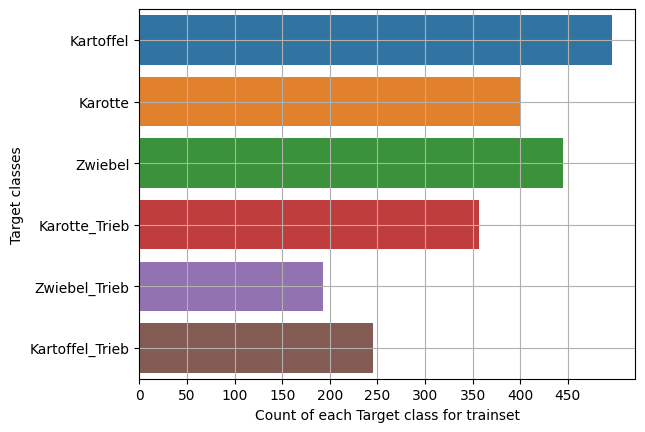

In [96]:
ax = sns.countplot(y=vegis_train['Label'], data=vegis_train)
plt.xlabel("Count of each Target class for trainset")
plt.ylabel("Target classes")
plt.grid()
plt.xticks(np.arange(0,500, step=50))
plt.show()

Die Klassenverteilung für den Testdatensatz

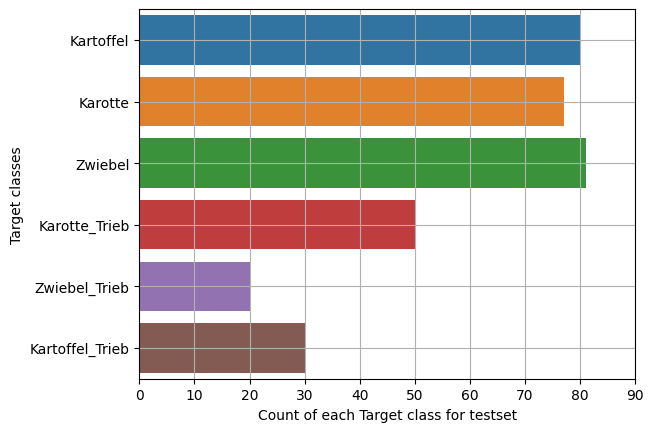

In [97]:
ax = sns.countplot(y=vegis_test['Label'], data=vegis_test)
plt.xlabel("Count of each Target class for testset")
plt.ylabel("Target classes")
plt.grid()
plt.xticks(np.arange(0,100, step=10))
plt.show()

Der Überblick über beide Datensätze zeigt :<br>
- Trainingsdaten = (2137, 11)<br>
- Testdaten = (338, 11)<br>
- Keine fehlenden Daten<br>
- 6 verschiedene Zielklassen: "Kartoffel", "Karotte", "Zwiebel", "Karotte_Trieb", "Zwiebel_Trieb", "Kartoffel_Trieb"<br>
- Die Klassenverteilung ist nicht ausgeglichen<br>

Scatterplots der feature
ab hier wird nur noch auf den Trainingsdatensatz eingegangen<br>
Entfernen der Spalte R, G und B

In [98]:
vegis_train_for_scatter_plot = vegis_train.drop(columns=["R", "G", "B"])

Eventuell die Label direkt in umwandeln in die Zahlen

In [99]:
def encoding_labels(df, col_name, encoding):
    df.loc[df[col_name] == 'Karotte', col_name] = encoding[0]  #0
    df.loc[df[col_name] == 'Kartoffel', col_name] = encoding[1]  #1
    df.loc[df[col_name] == 'Zwiebel', col_name] = encoding[2]  #2
    df.loc[df[col_name] == 'Karotte_Trieb', col_name] = encoding[3]  #3
    df.loc[df[col_name] == 'Kartoffel_Trieb', col_name] = encoding[4]  #4
    df.loc[df[col_name] == 'Zwiebel_Trieb', col_name] = encoding[5]  #5
    
    return df

In [100]:
vegis_train_for_scatter_plot_2 = vegis_train_for_scatter_plot.copy()
col = vegis_train_for_scatter_plot.iloc[:,-1] 
vegis_train_for_scatter_plot_2['Classes'] = col
vegis_train_for_scatter_plot_2.rename(columns={"Label": "Classes", "Classes": "Label"}, inplace=True)  # just swap the names

vegis_train_for_scatter_plot_2 = encoding_labels(vegis_train_for_scatter_plot_2, "Classes", [0,1,2,3,4,5])
vegis_train_for_scatter_plot_2['Classes'] = vegis_train_for_scatter_plot_2['Classes'].astype('int')

vegis_train_for_scatter_plot_2 = encoding_labels(vegis_train_for_scatter_plot_2, "Label", ["Karotte (0)", "Kartoffel (1)", "Zwiebel (2)", "Karotte_Trieb (3)", 
                                                                                           "Kartoffel_Trieb (4)", "Zwiebel_Trieb (5)"])

display(vegis_train_for_scatter_plot_2.head(3))

,Hight,Width,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Classes,Label
0,174,111,0,0.747411,0.740759,39,12.664070,1,Kartoffel (1)
1,97,65,0,0.785250,0.812063,18,7.130874,1,Kartoffel (1)
2,139,124,0,0.826178,0.791622,36,5.622304,1,Kartoffel (1)


In [101]:
vegis_train_for_scatter_plot_2['Classes'].value_counts()

Classes
1    496
2    445
0    401
3    357
4    245
5    193
Name: count, dtype: int64

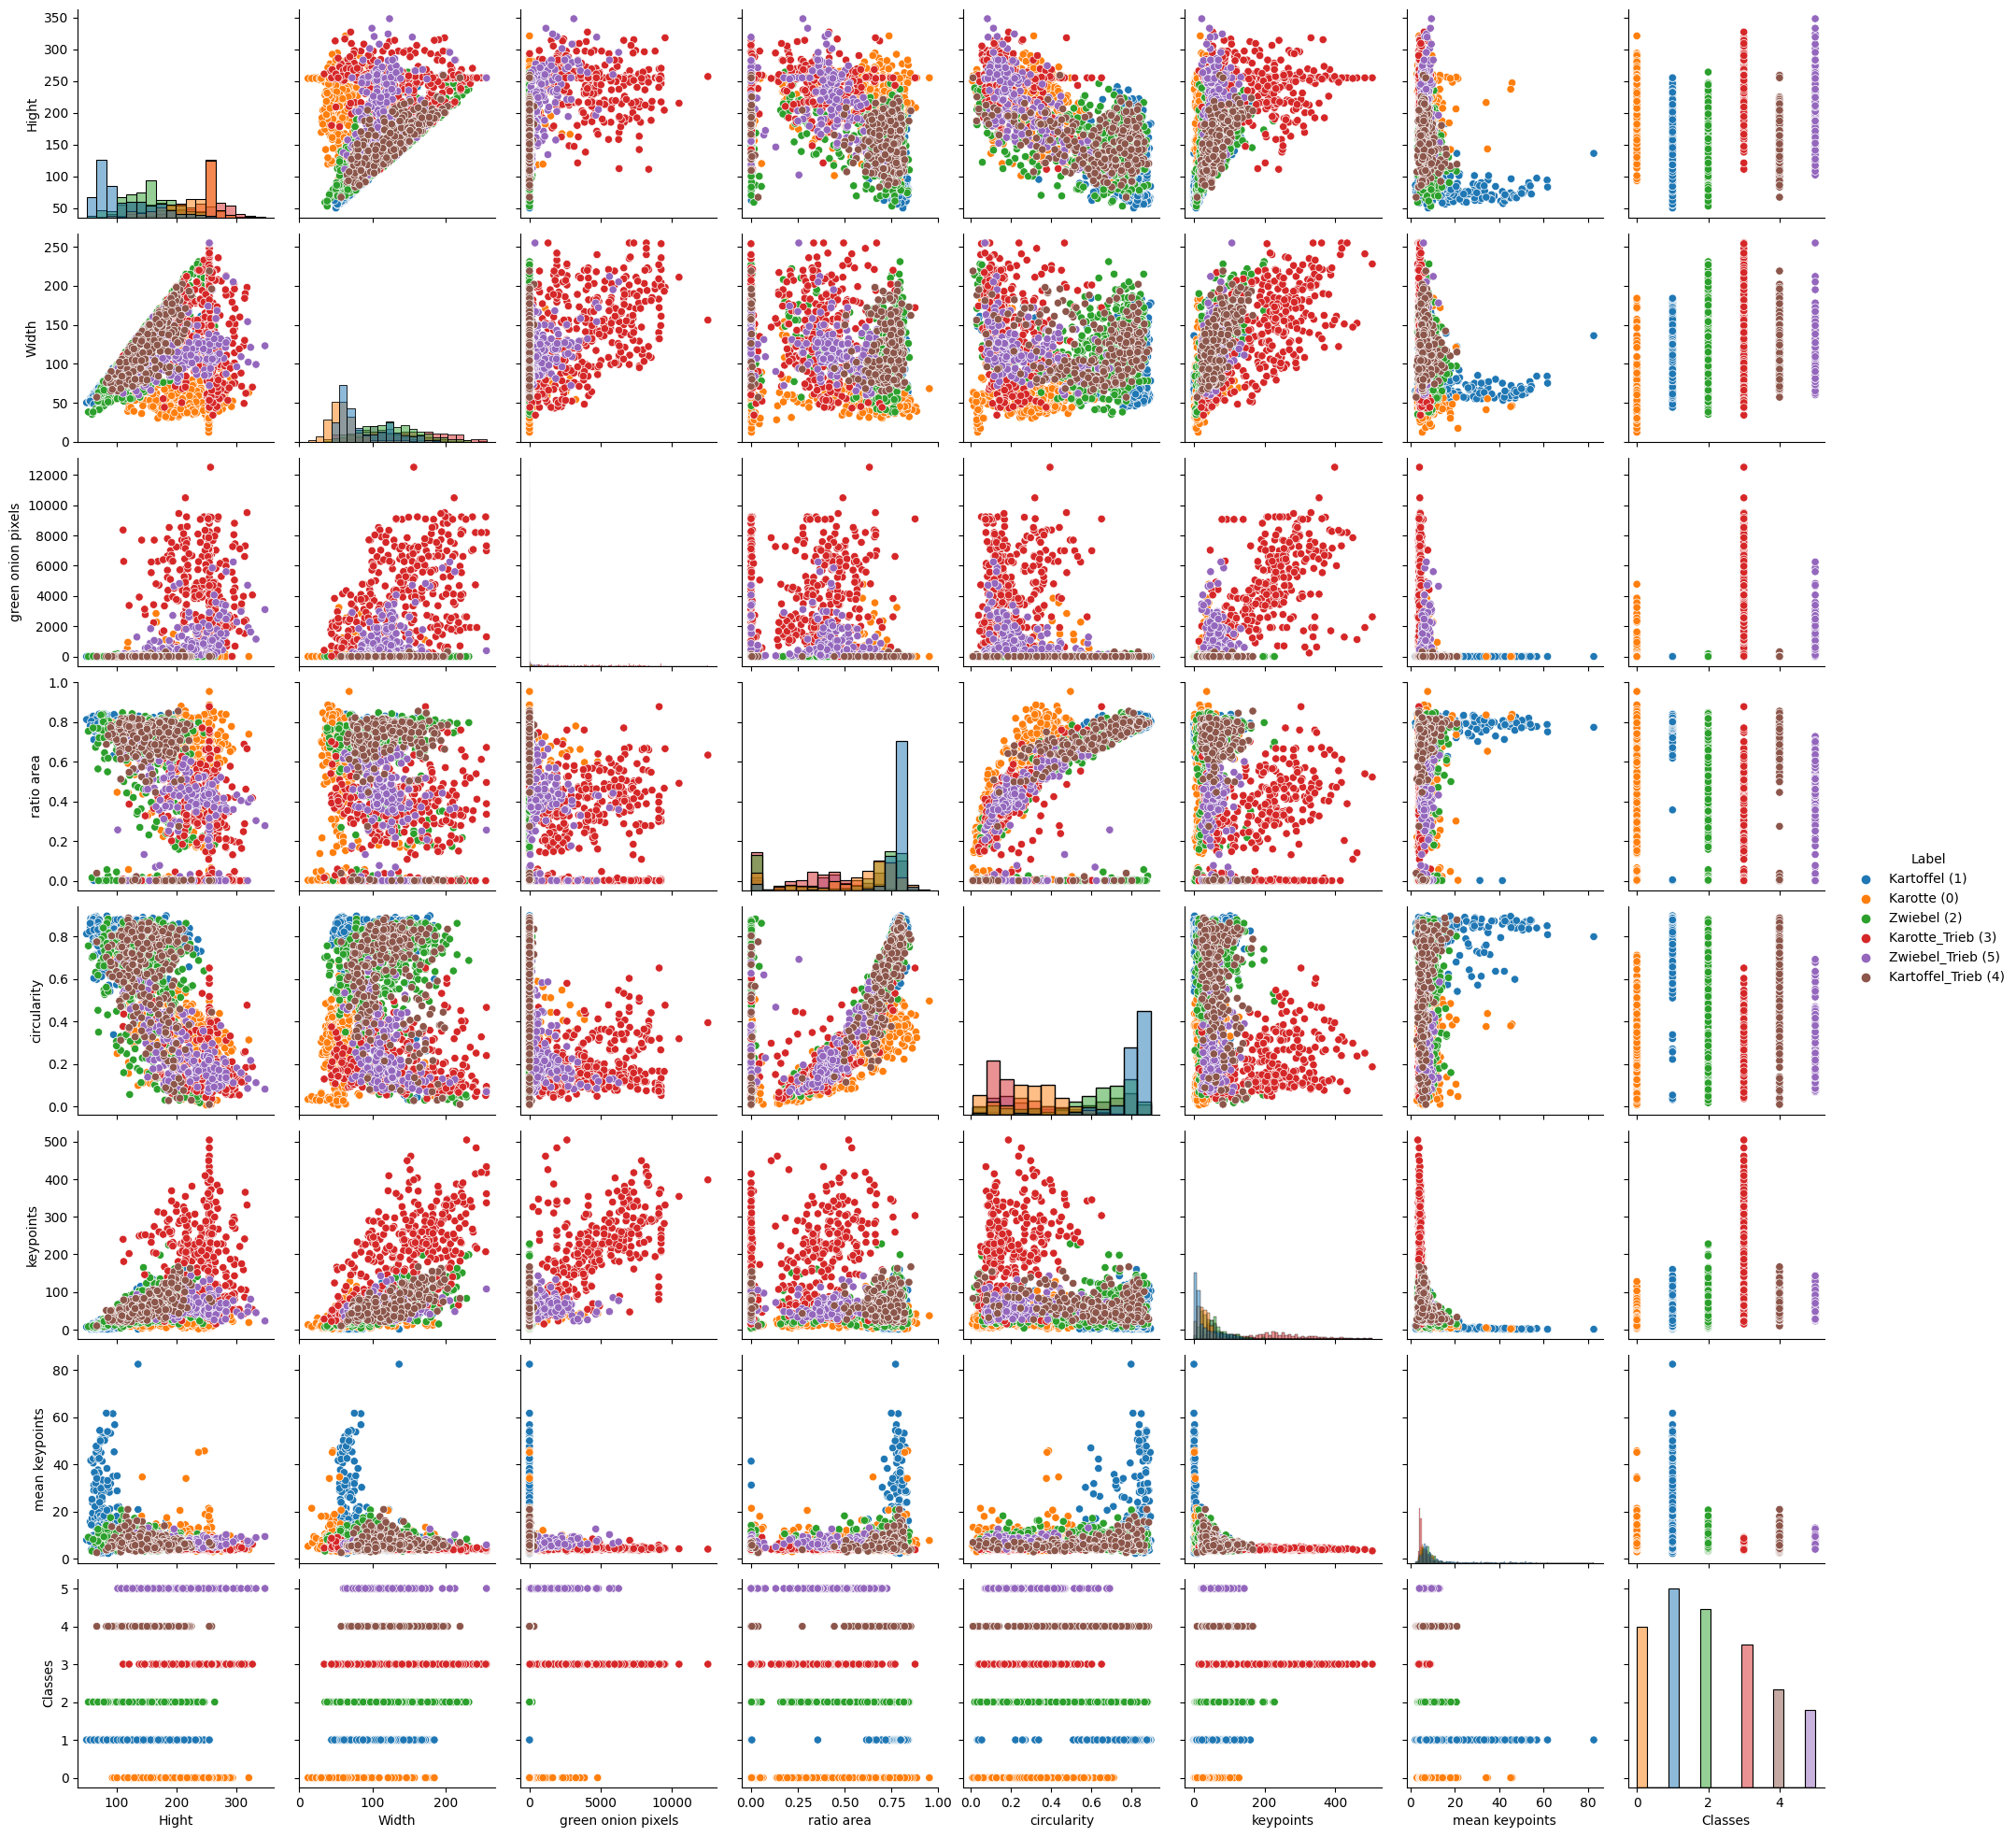

In [102]:
feature_plot = sns.pairplot(vegis_train_for_scatter_plot_2, diag_kind='hist', hue="Label")

Distribution plot for Karotte


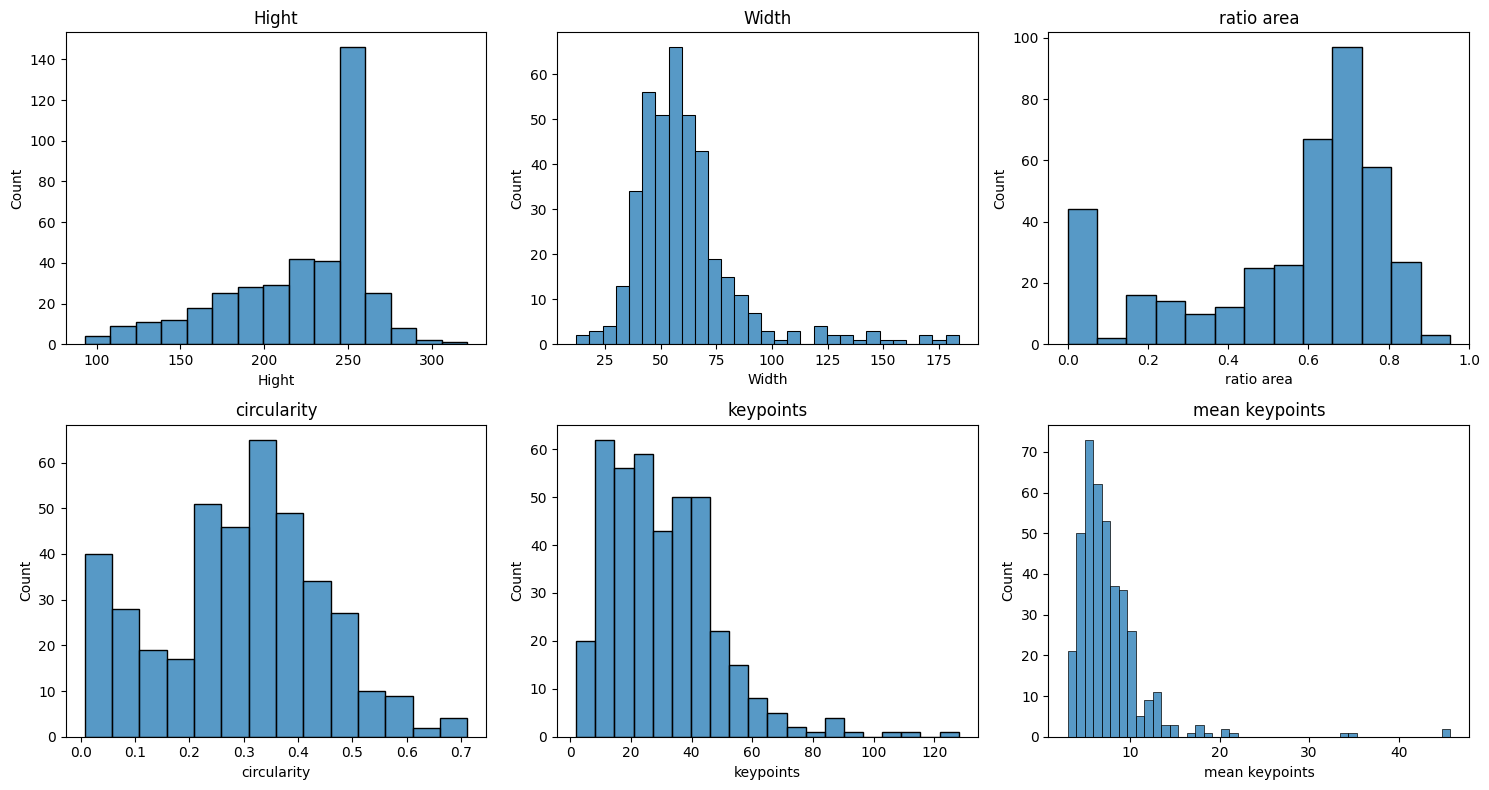




Distribution plot for Kartoffel


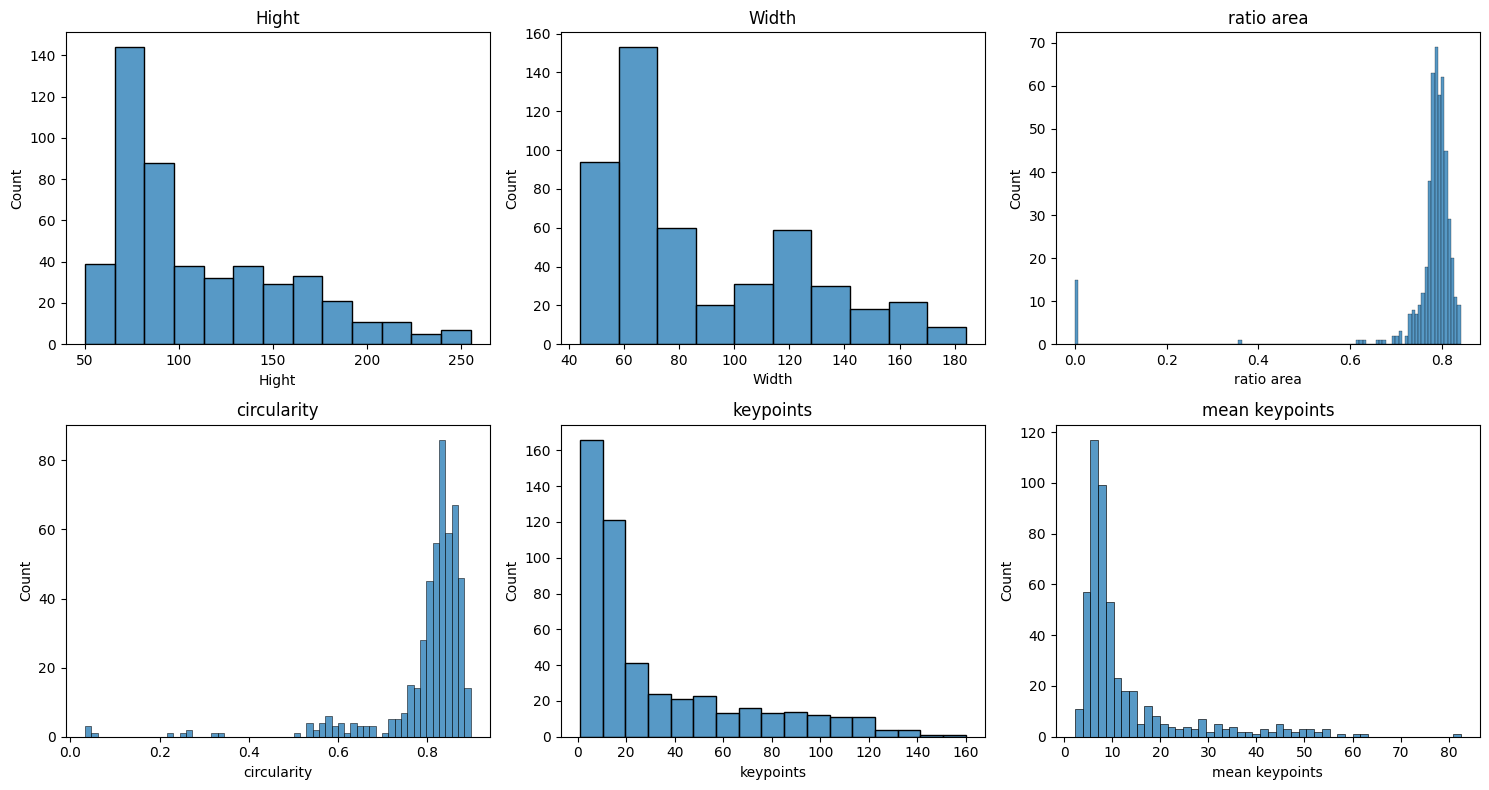




Distribution plot for Zwiebel


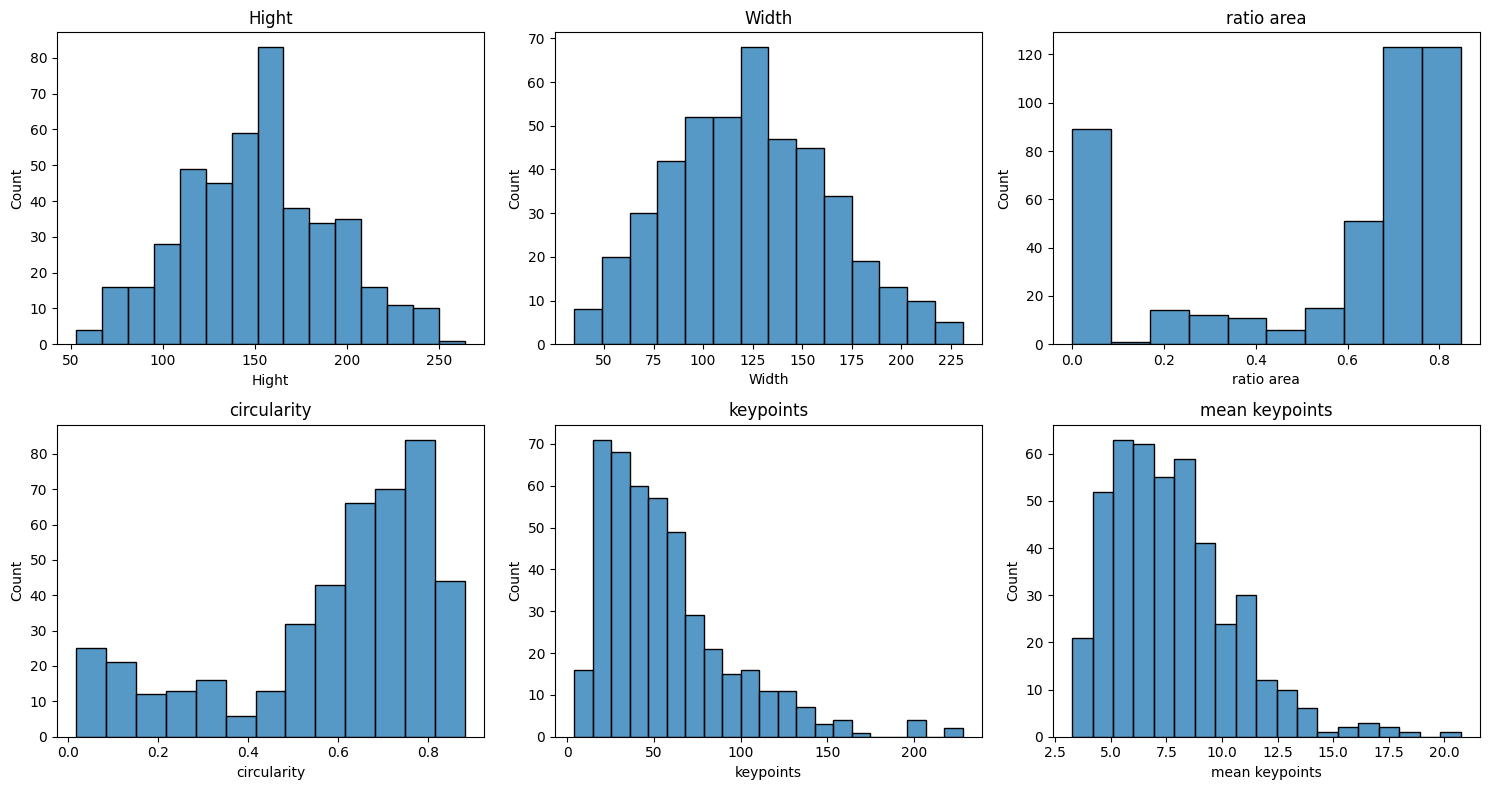

In [103]:
vegis_train_dist_plot = vegis_train_for_scatter_plot.copy()
vegis_train_dist_plot.drop(columns=["green onion pixels"], inplace=True)
vegis_for_plot = ["Karotte", "Kartoffel", "Zwiebel"]
vegis_train_dist_plot.head(2)

for vegi in vegis_for_plot:
    v_df =  vegis_train_dist_plot.loc[vegis_train_dist_plot["Label"] == vegi]
    v_df_without_label = v_df.drop(columns=["Label"])
    print(f"Distribution plot for {vegi}")
    cols = v_df_without_label.columns
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()
    for i, col in enumerate(cols):
        sns.histplot(v_df_without_label[col], ax=axes[i], kde=False)
        axes[i].set_title(col)

    #fig.delaxes(axes[8])
    plt.tight_layout()
    plt.show()
    print("\n\n")


PCA

In [104]:
vegis_for_pca = vegis_train.copy()
train_pca = vegis_for_pca.drop(columns=["Label"])
print("Daten für die PCA")
display(train_pca.head(2))
print("\n\n")

x_train_scaled = (train_pca - train_pca.mean()) / train_pca.std()
#display(x_train_scaled.head(2))

pca = PCA(n_components=10)
pca.fit(x_train_scaled)

PCA_df = pd.DataFrame({'1. HK': pca.components_[0,:], 
                       '2. HK': pca.components_[1,:], 
                       '3. HK': pca.components_[2,:],
                       '4. HK': pca.components_[3,:],
                       '5. HK': pca.components_[4,:],
                       '6. HK': pca.components_[5,:],
                       '7. HK': pca.components_[6,:],
                       '8. HK': pca.components_[7,:],
                       '9. HK': pca.components_[8,:],
                       '10. HK': pca.components_[9,:]})
PCA_df.insert(loc=0, column='Feature', value = ['Hight','Width','R','G','B','green onion pixels','ratio area','circularity','keypoints','mean keypoints'])
print("Transformierte Matrix")
display(PCA_df.head(2))
print("\n\n")

PCA_2_df = pd.DataFrame({'Total': pca.explained_variance_[:]})
PCA_2_df.insert(loc=0, column='Komponente', value = ['1.HK','2.HK','3.HK','4.HK','5.HK','6.HK','7.HK','8.HK','9.HK','10.HK'])
letzte_Spalte_df = pd.DataFrame({'Prozent der Varianz': pca.explained_variance_ratio_[:]})
PCA_2_df['Prozent der Varianz'] = letzte_Spalte_df
print("Anteile der Varianz in den Daten")
display(PCA_2_df.head(10))

Daten für die PCA


,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
0,174,111,121,98,76,0,0.747411,0.740759,39,12.664070
1,97,65,109,84,50,0,0.785250,0.812063,18,7.130874





Transformierte Matrix


,Feature,1. HK,2. HK,3. HK,4. HK,5. HK,6. HK,7. HK,8. HK,9. HK,10. HK
0,Hight,-0.402612,0.030031,0.322827,-0.170183,0.398278,0.043812,-0.425853,-0.062468,-0.597954,-0.021811
1,Width,-0.304780,0.122784,-0.485034,0.167280,-0.025986,0.635609,-0.296428,-0.324054,0.176484,-0.009542





Anteile der Varianz in den Daten


,Komponente,Total,Prozent der Varianz
0,1.HK,3.816893,0.381689
1,2.HK,2.150532,0.215053
2,3.HK,1.321118,0.132112
3,4.HK,0.791190,0.079119
4,5.HK,0.607499,0.060750
5,6.HK,0.558379,0.055838
6,7.HK,0.373751,0.037375
7,8.HK,0.158370,0.015837
8,9.HK,0.147917,0.014792
9,10.HK,0.074350,0.007435


Get Testset

In [105]:
vegis_test = encoding_labels(vegis_test, "Label", [0,1,2,3,4,5])
vegis_test['Label'] = vegis_test['Label'].astype('int')

X_test = vegis_test.iloc[:, 0:10]
y_test = vegis_test.iloc[:, 10]

print("Size testdata: ", X_test.shape)
display(X_test.head(2))
display(y_test.head(2))

In [106]:
print("Size testdata: ", X_test.shape)

Size testdata:  (338, 10)


Vorstellung der verwendeten Modelle<br>
Übersicht:<br>
- Logistische Regression
- K-Neighrest Neighbours
- Decission Tree
- CNN 

***Logistische Regression:***
- Parameter:
    - max_iter= 25000
    - tol= 0.001
    - Regularization: ridge (l2), C = 1.0 (default)
    - multi_class= multinomial

- Evaluierung:
    - Accuracy Gesamt = 90 % auf die Testdaten (Sklearn Model)
    - Accuracy Gesamt = 89 % auf die Testdaten (Eigenes Model)
    
- Trainingsdatensatz:
    - Features = Alle (10)
    - Anzahl Datenpunkte = 1816
    - degree= 2 (PolynomialFeatures)
    - Daten sind mit Standardscaler skaliert

- Validierungsdatensatz:
    - Features = Alle (10)
    - Anzahl Datenpunkte = 321
    - degree= 2 (PolynomialFeatures)
    - Daten sind mit Standardscaler skaliert

- Testdatensatz
    - Anzahl Datenpunkte = 338
    - degree= 2 (PolynomialFeatures)
    - Daten sind mit Standardscaler skaliert


https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter

Bei der hier aufgeführten Evaluierungsmatrix wird für jedes Gemüse der Binäre Klassifikationsfall betrachtet, nach folgendem Schema<br>
| | Karotte<br>Label | Nicht Karotte<br>Label |
| :- | :-: | :-: |
| ***Karotte***<br>Vorhersage | TP | FP |
| ***Nicht Karotte***<br>Vorhersage | FN | TN |

<br>
<br>
<br>
<br>
Die Gesamtperformance des Modells ergibt sich aus dem Mittelwert der einzelnen Evaluierungen. Weil unsere Modelle eine Multiklassifizierung durchführen, werden die Durchschnittsbildungen der Metriken per 'makro' bestimmt. Dies bietet sich an, da unsere Datenverteilung ungleichmäßig ist und wir jeder Klasse die gleiche Bedeutung zuweisen. <br>
<br>

|  | Karotte | Kartoffel | Zwiebel | Karotte_Trieb | Kartoffel_Trieb | Zwiebel_Trieb |
| :- | :-: | :-: | :-: | :-: | :-: | :-: |
| ***Precision (lib/own)*** | 1.0  | 0.76 | 0.9 | 0.96 | 0.90 | 0.95 |
| ***Recall (lib/own)*** | 0.92 | 0.91 | 0.90 | 0.98 | 0.82 | 0.79 |
| ***F1-Score (lib/own)*** | 0.96 | 0.83 | 0.90 | 0.97 | 0.86 | 0.86 |

In [107]:
class LogisticRegressionClassifier:
    def __init__(self, degree=2, max_iter=10000, tol=0.001):
        self.degree = degree
        self.max_iter = max_iter
        self.tol = tol
        self.weights = None
        self.classes = None
        self.cls_one_hot_encoding = None  # ground truth

    def predict(self, X):
        y_head = self._sigmoid(self.weights, X)
        prob = self._softmax(y_head.T)
        pred = np.argmax(prob, axis=1)  #Get Index (class) with highest score
        return pred

    def fit(self, X, y):
        # Train the model
        self.classes = np.sort(np.unique(y))  # ascending order
        self._init_weights(self.classes.shape[0], X.shape[1])  # Shape of (number of classes, number of features). Every class has his own weights vector
        self._create_label_matrix(y)

        # cls_one_hot_encoding (150,3) X.shape=(150,4)
        cost_list = []
        for _ in range(self.max_iter):
            y_head = self._sigmoid(self.weights, X)  # (3,150)
            prob = self._softmax(y_head.T)  # Row vector corresponds to the probability distribution for one sample (150,3)
            loss = self._log_loss(prob)

            self.weights = self.weights - self.tol * ((y_head - self.cls_one_hot_encoding.T) @ X) ### ??? Shapes... weights = (3,4) - (matrix with 3,4)
            cost_list.append(loss)
        return cost_list

    def _sigmoid(self, w, X):
        Z = np.float64(w @ X.T)
        y_head = 1 / (1 + np.exp(-Z))
        return y_head
    
    # https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python
    def _softmax(self, y_head):
        assert len(y_head.shape) == 2
        s = np.max(y_head, axis=1)
        s = s[:, np.newaxis] # necessary step to do broadcasting. Transform array into next dimension as column vector
        e_x = np.exp(y_head - s)
        div = np.sum(e_x, axis=1)
        div = div[:, np.newaxis]
        return e_x / div

    def _log_loss(self, prob):
        # label matrix 
        L = np.multiply(self.cls_one_hot_encoding, np.log(prob))
        log_loss = -(np.sum(L)) / len(self.cls_one_hot_encoding)
        return log_loss

    def _create_label_matrix(self, y):
        #print("Classes: ", self.classes)
        self.cls_one_hot_encoding = np.zeros((len(y), len(self.classes)))  # (150, 3)
        for i, label in enumerate(y):
            self.cls_one_hot_encoding[i][label] = 1

    def _init_weights(self, num_cls, num_feat):
        self.weights = abs(np.random.randn(num_cls, num_feat))
        #print("Init Weights: \n", self.weights)

In [108]:
def get_evaluation_metrices(confusion_matrix, vegi):
    cls = {'Karotte': 0, 'Kartoffel': 1, 'Zwiebel': 2, 'Karotte_Trieb': 3, 'Kartoffel_Trieb': 4, 'Zwiebel_Trieb': 5}[vegi]
    #print(cls)

    tp = confusion_matrix[cls][cls]
    fn = np.sum(confusion_matrix, axis=0)[cls] - tp
    fp = np.sum(confusion_matrix, axis=1)[cls] - tp
    tn = np.sum(confusion_matrix) - (tp + fn + fp)
    print(f"Classifications for {vegi}: tp= {tp} | fn= {fn} | fp= {fp} | tn= {tn}\n")

    acc = round((tp + tn)/ (tp + fn + fp + tn), 2)
    prec = round(tp / (tp + fp), 2)
    rec = round(tp / (tp + fn), 2)
    f1 = round(2 * ((prec * rec) / (prec + rec)), 2)

    return acc, prec, rec, f1


def pretty_print_evaluations(acc, prec, rec, f1, setname, vegi):
    print(f"{vegi.upper()}\nEvaluation scores for {setname}\nAccuracy= {acc} %\nPrecission= {prec} %\nRecall= {rec} %\nF1-Score= {f1} %\n\n{len(vegi)*'-'}")


def evaluate_model(clf, y_label, pred_val, X, type_dataset, kind_confusion_matrix):
    if kind_confusion_matrix == "sklearn":
        disp = ConfusionMatrixDisplay.from_estimator(
            clf,
            X,
            y_label,
            display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb', 'Kartoffel_Trieb', 'Zwiebel_Trieb'],
            xticks_rotation="vertical",
            cmap='viridis',
            normalize=None,
        )
        disp.ax_.set_title(f"Confusion Matrix {type_dataset}")
        print(disp.confusion_matrix)
        print("\n\n")

    elif kind_confusion_matrix == "own":
        cm = ConfusionMatrixDisplay.from_predictions(
            y_label,
            pred_val,
            display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb', 'Kartoffel_Trieb', 'Zwiebel_Trieb'],
            xticks_rotation="vertical"
        )
        cm.ax_.set_title(f"Confusion Matrix {type_dataset}")

    vegis_list = ["Kartoffel", "Karotte", "Zwiebel", "Karotte_Trieb", "Kartoffel_Trieb", "Zwiebel_Trieb"]
    conf_matrix = confusion_matrix(y_label, pred_val)
    print("\n\n")
    prec = []
    rec = []
    f1 = []
    for vegi in vegis_list:    
        acc_val, prec_val, rec_val, f1_val = get_evaluation_metrices(conf_matrix, vegi)
        prec.append(prec_val)
        rec.append(rec_val)
        f1.append(f1_val)
        pretty_print_evaluations(acc_val, prec_val, rec_val, f1_val, type_dataset, vegi)
    print(f"***** Means: Precission = {sum(prec)/len(prec)}\n || Recall = {sum(rec)/len(rec)}\n || f1 = {sum(f1)/len(f1)}\n")

In [109]:
vegis_train = encoding_labels(vegis_train, "Label", [0,1,2,3,4,5])
vegis_train['Label'] = vegis_train['Label'].astype('int')

X = vegis_train.iloc[:, 0:10]
y = vegis_train.iloc[:, 10]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
print("Shape trainset: ", X_train.shape)
print("Shape validationset: ", X_val.shape)

Shape trainset:  (1816, 10)
Shape validationset:  (321, 10)


In [110]:
pipe_lg = make_pipeline(PolynomialFeatures(2),
                        StandardScaler(), 
                        LogisticRegression(penalty='l2', tol=0.001, solver='lbfgs', max_iter=25000, multi_class='multinomial'))
pipe_lg

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=25000, multi_class='multinomial',
                                    tol=0.001))])

Model Accuracy Validationset: 0.9034267912772586 %
Model Accuracy Trainset: 0.900330396475771 %
Model Accuracy Testset: 0.9053254437869822 %

[[323   1   9   1   3  12]
 [  6 385   5   0  26   0]
 [  5   8 352   0   6   5]
 [  8   0   0 277   0   9]
 [  0  46   1   0 157   2]
 [  3   0  13   7   5 141]]






Classifications for Kartoffel: tp= 385 | fn= 55 | fp= 37 | tn= 1339

KARTOFFEL
Evaluation scores for Trainset
Accuracy= 0.95 %
Precission= 0.91 %
Recall= 0.88 %
F1-Score= 0.89 %

---------
Classifications for Karotte: tp= 323 | fn= 22 | fp= 26 | tn= 1445

KAROTTE
Evaluation scores for Trainset
Accuracy= 0.97 %
Precission= 0.93 %
Recall= 0.94 %
F1-Score= 0.93 %

-------
Classifications for Zwiebel: tp= 352 | fn= 28 | fp= 24 | tn= 1412

ZWIEBEL
Evaluation scores for Trainset
Accuracy= 0.97 %
Precission= 0.94 %
Recall= 0.93 %
F1-Score= 0.93 %

-------
Classifications for Karotte_Trieb: tp= 277 | fn= 8 | fp= 17 | tn= 1514

KAROTTE_TRIEB
Evaluation scores for Trainset
Accuracy= 0.99 %


[[47  0  1  0  3  1]
 [ 0 70  0  0  4  0]
 [ 1  2 66  0  0  0]
 [ 2  0  1 59  0  1]
 [ 0  9  0  1 29  0]
 [ 1  0  2  1  1 19]]






Classifications for Kartoffel: tp= 70 | fn= 11 | fp= 4 | tn= 236

KARTOFFEL
Evaluation scores for Validationset
Accuracy= 0.95 %
Precission= 0.95 %
Recall= 0.86 %
F1-Score= 0.9 %

---------
Classifications for Karotte: tp= 47 | fn= 4 | fp= 5 | tn= 265

KAROTTE
Evaluation scores for Validationset
Accuracy= 0.97 %
Precission= 0.9 %
Recall= 0.92 %
F1-Score= 0.91 %

-------
Classifications for Zwiebel: tp= 66 | fn= 4 | fp= 3 | tn= 248

ZWIEBEL
Evaluation scores for Validationset
Accuracy= 0.98 %
Precission= 0.96 %
Recall= 0.94 %
F1-Score= 0.95 %

-------
Classifications for Karotte_Trieb: tp= 59 | fn= 2 | fp= 4 | tn= 256

KAROTTE_TRIEB
Evaluation scores for Validationset
Accuracy= 0.98 %
Precission= 0.94 %
Recall= 0.97 %
F1-Score= 0.95 %

-------------
Classifications for Kartoffel_Trieb: tp= 29 | fn= 8 | fp= 10 | tn= 274

KARTOFFEL_TRIEB
Evaluation scores fo

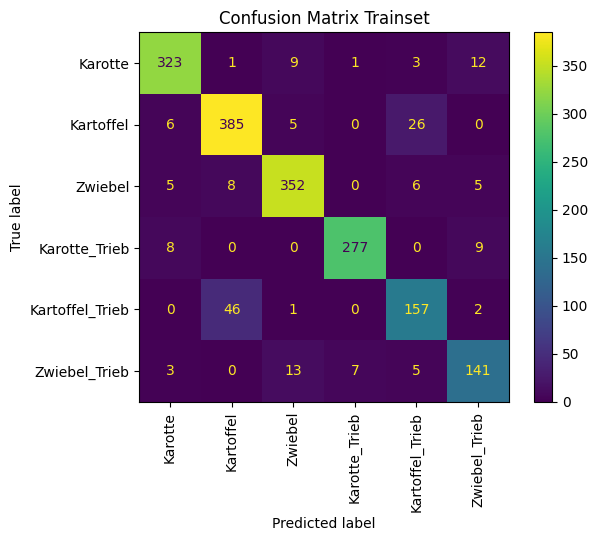

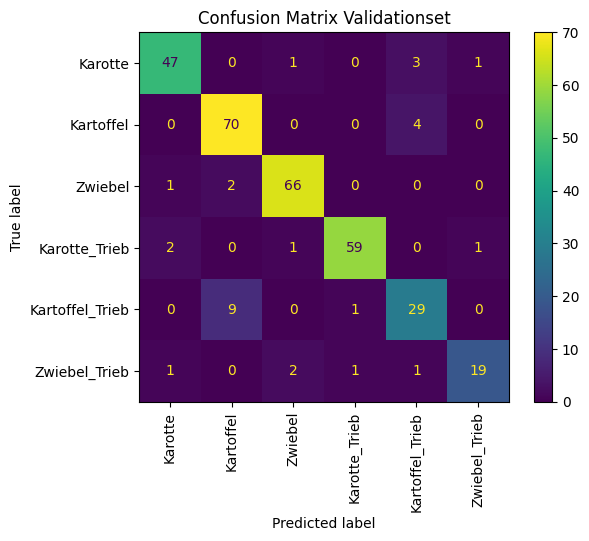

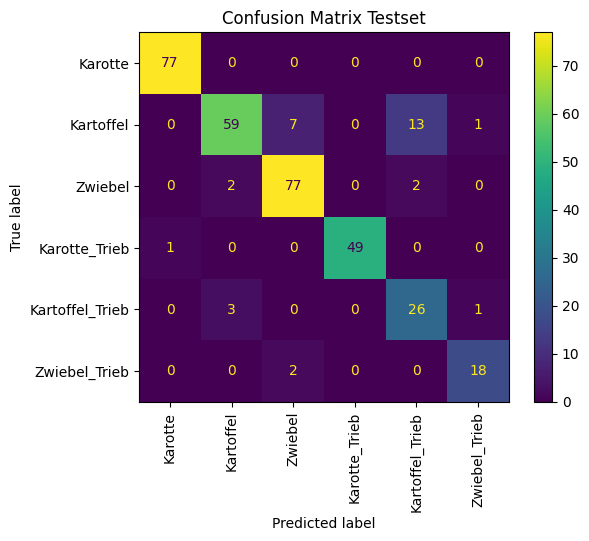

In [111]:
pipe_lg.fit(X_train, y_train)
pred_val = pipe_lg.predict(X_val)
pred_train = pipe_lg.predict(X_train)
pred_test = pipe_lg.predict(X_test)

accuracy_train = accuracy_score(y_train, pred_train)
accuracy_val = accuracy_score(y_val, pred_val)
accuracy_test = accuracy_score(y_test, pred_test)
print(f"Model Accuracy Validationset: {accuracy_val} %\nModel Accuracy Trainset: {accuracy_train} %\nModel Accuracy Testset: {accuracy_test} %\n")

evaluate_model(pipe_lg, y_train, pred_train, X_train, "Trainset", "sklearn")
evaluate_model(pipe_lg, y_val, pred_val, X_val, "Validationset", "sklearn")
evaluate_model(pipe_lg, y_test.to_numpy(), pred_test, X_test, "Testset", "sklearn")

In [112]:
lgclf_own = LogisticRegressionClassifier(degree=2, max_iter=25000, tol=0.001)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
poly = PolynomialFeatures(degree=2)
X_train_transformed = poly.fit_transform(X_train_scaled)


X_test_scaled = scaler.transform(X_test)
X_test_transformed = poly.transform(X_test_scaled)
print(X_train_transformed.shape)
print(X_test_transformed.shape)

(1816, 66)
(338, 66)


In [113]:
train_log_loss = lgclf_own.fit(X_train_transformed, y_train.to_numpy())
print("finish training")
pred_train = lgclf_own.predict(X_train_transformed)
pred_test = lgclf_own.predict(X_test_transformed)

C:\Users\Leon\AppData\Local\Temp\ipykernel_6016\715924384.py:35: RuntimeWarning: overflow encountered in exp
  y_head = 1 / (1 + np.exp(-Z))


finish training


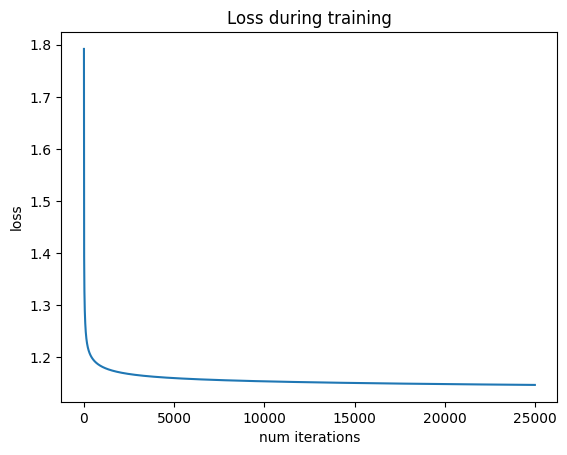

In [114]:
x_ = [i for i in range(len(train_log_loss))]
plt.plot(x_, train_log_loss)
plt.title("Loss during training")
plt.xlabel("num iterations")
plt.ylabel("loss")
plt.show()

Model Accuracy Trainset: 0.9344713656387665 %
Model Accuracy Testset: 0.9023668639053254 %




Classifications for Kartoffel: tp= 389 | fn= 39 | fp= 33 | tn= 1355

KARTOFFEL
Evaluation scores for Trainset
Accuracy= 0.96 %
Precission= 0.92 %
Recall= 0.91 %
F1-Score= 0.91 %

---------
Classifications for Karotte: tp= 337 | fn= 9 | fp= 12 | tn= 1458

KAROTTE
Evaluation scores for Trainset
Accuracy= 0.99 %
Precission= 0.97 %
Recall= 0.97 %
F1-Score= 0.97 %

-------
Classifications for Zwiebel: tp= 356 | fn= 14 | fp= 20 | tn= 1426

ZWIEBEL
Evaluation scores for Trainset
Accuracy= 0.98 %
Precission= 0.95 %
Recall= 0.96 %
F1-Score= 0.95 %

-------
Classifications for Karotte_Trieb: tp= 289 | fn= 6 | fp= 5 | tn= 1516

KAROTTE_TRIEB
Evaluation scores for Trainset
Accuracy= 0.99 %
Precission= 0.98 %
Recall= 0.98 %
F1-Score= 0.98 %

-------------
Classifications for Kartoffel_Trieb: tp= 172 | fn= 36 | fp= 34 | tn= 1574

KARTOFFEL_TRIEB
Evaluation scores for Trainset
Accuracy= 0.96 %
Precission= 0

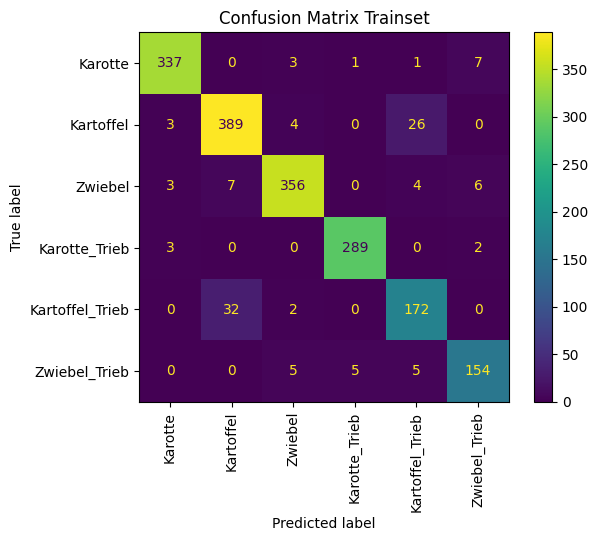

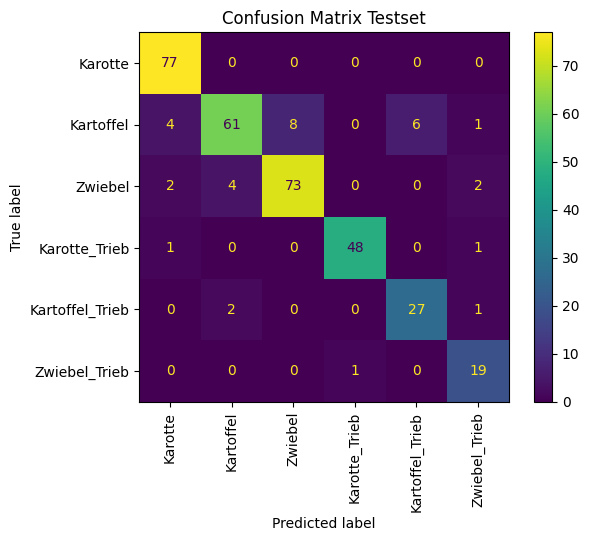

In [115]:
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test = accuracy_score(y_test.to_numpy(), pred_test)
print(f"Model Accuracy Trainset: {accuracy_train} %\nModel Accuracy Testset: {accuracy_test} %\n")

evaluate_model(lgclf_own, y_train, pred_train, X_train_transformed, "Trainset", "own")
evaluate_model(lgclf_own, y_test.to_numpy(), pred_test, X_test_transformed, "Testset", "own")

In [116]:
#Weights from own classifier
#Each class has their own weights. The model trained 6 classifiers.
print(lgclf_own.weights.shape)

(6, 66)


***Decission Tree:***
- Parameter:
    sklearn
    - max_depth= 10
    - min_samples= 10
    - loss = gini
    eigener
    - max_depth= 15
    - min_samples= 1

- Evaluierung:
    - Accuracy Gesamt = 0.76 % auf die Testdaten (Sklearn)
    - Accuracy Gesamt = 0.364 % auf die Testdaten (Eigener)
    
- Trainingsdatensatz:
    - Features = Alle
    - Anzahl Datenpunkte = 1816

- Testdatensatz
    - Features = Alle
    - Anzahl Datenpunkte = 338

In [117]:
class DecissionTree:
    def __init__(self, max_depth, min_size):
        self.max_depth = max_depth
        self.min_size = min_size
        self.depth = 0
        self.classes_dataset = None
        self.tree = None

    def fit(self, dataset):
        """
        X: array(n,d)
        y: array(labels)
        """
        #self.classes_dataset = list(set(dataset[:,-1]))
        
        # Nach jedem Split gibt es ein neuen Datensatz der dann übergeben werden muss 
        root = self._get_split(dataset)
        self.depth += 1
        self._split(root)
        self.tree = root
        

    def _split(self, node):
        left, right = node['buckets']
        del(node['buckets'])
        #print("Left: ", left)
        #print("Right: ", right)
        # Check if there was no split. The lists are empty
        if not left or not right:
            # Add amount of each class to the node
            node['left'] = node['right'] = self._to_terminal(left + right)
            return
        if self.depth >= self.max_depth:
            node['left'], node['right'] = self._to_terminal(left), self._to_terminal(right)
            return
        if len(left) <= self.min_size:
            node['left'] = self._to_terminal(left)
        else:
            node['left'] = self._get_split(left)
            self.depth += 1
            self._split(node['left'])
        
        if len(right) <= self.min_size:
            node['right'] = self._to_terminal(right)
        else:
            node['right'] = self._get_split(right)
            self.depth += 1
            self._split(node['right'])
        
    def _get_split(self, dataset):
        best_feat, best_thresh, best_gini_loss, best_buckets = 999, 999, 999, None
        #unique_cls_values = list(set(dataset[:,-1]))
        #print("DATASET: ,", dataset)
        unique_cls_values = list(set(row[-1] for row in dataset))
        # Do the split for each feature in the dataset (X)
        for idx in range(len(dataset[0])-1): # do not use the label for split
            # assign all instances to a split
            #print("Split for ", idx)
            for row in dataset:
                buckets = self._create_split(idx, row[idx], dataset)
            # evaluate the split for the two groups
            gini_loss = self._gini_loss(buckets, unique_cls_values)
            #print("New Gini loss: ", gini_loss)

            # check if the split is better than the current best split. If true, keep it
            if gini_loss < best_gini_loss:
                best_gini_loss = gini_loss
                best_feat = idx
                best_thresh = row[idx]
                best_buckets = buckets

                #print(f"best gini: {best_gini_loss}\nbest feat Idx: {best_feat}\nbest thresh: {best_thresh}\nbest buckets: {best_buckets}")
        return {'feature_idx': best_feat, 'thresh': best_thresh, 'buckets': best_buckets}

    def _create_split(self, idx, thresh, dataset):
        # idx = current feature for the split
        # thresh = current threshold for the split. Now check value for the whole dataset. Then grab the next threshold
        left_bucket, right_bucket = list(), list()
        for row in dataset:
            if row[idx] <= thresh:
                left_bucket.append(row)  #append row instead of only the label
            else:
                right_bucket.append(row)

        return left_bucket, right_bucket

    def _gini_loss(self, buckets, cls_values):
        # cls_values: Are the values in the current dataset 
        #print("Class Values i ngini : ", cls_values)
        n_instances = float(sum(len(bucket) for bucket in buckets))
        #print("Number Instances: ", n_instances)

        gini = 0.0
        for bucket in buckets:
            size = float(len(bucket))
            # calculate gini score for left and right bucket
            if size == 0:
                continue
            score = 0.0
            for cls_val in cls_values:
                ratio = [row[-1] for row in bucket].count(cls_val) / size
                #ratio = bucket.count(cls_val) / size
                score += ratio**2

            gini += (size / n_instances) * (1.0 - score)
        return gini
    
    def _to_leaf(self, bucket):
        pred_cls = {cls:0 for cls in self.classes_dataset}
        for c in self.classes_dataset:
            pred_cls[c] = bucket.count(c)
        return pred_cls
    
    def _to_terminal(self, bucket):
        outcomes = [row[-1] for row in bucket]
        
        return max(set(outcomes), key=outcomes.count)
    
    def predict(self, X_test):
        predictions = list()
        node = self.tree
       
        for row in X_test:
            pred = self._make_predictions(node, row)
            predictions.append(pred)
        return predictions
    
    def _make_predictions(self, node, row):
        if row[node['feature_idx']] < node['thresh']:
            if isinstance(node['left'], dict):
                return self._make_predictions(node['left'], row)
            else:
                return node['left'] #final prediction
        else:
            if isinstance(node['right'], dict):
                return self._make_predictions(node['right'], row)
            else:
                return node['right'] #final prediction

Decission Tree von Sklearn

Model Sklearn Accuracy Testset: 0.7603550295857988 %
Model Accuracy Trainset: 0.8573788546255506 %
Model Accuracy Validationset: 0.7975077881619937 %



[[70  2  5  0  0  0]
 [ 0 47 15  0 17  1]
 [ 3 13 61  0  2  2]
 [ 0  0  0 43  0  7]
 [ 0  6  7  0 17  0]
 [ 1  0  0  0  0 19]]






Classifications for Kartoffel: tp= 47 | fn= 21 | fp= 33 | tn= 237

KARTOFFEL
Evaluation scores for Testset
Accuracy= 0.84 %
Precission= 0.59 %
Recall= 0.69 %
F1-Score= 0.64 %

---------
Classifications for Karotte: tp= 70 | fn= 4 | fp= 7 | tn= 257

KAROTTE
Evaluation scores for Testset
Accuracy= 0.97 %
Precission= 0.91 %
Recall= 0.95 %
F1-Score= 0.93 %

-------
Classifications for Zwiebel: tp= 61 | fn= 27 | fp= 20 | tn= 230

ZWIEBEL
Evaluation scores for Testset
Accuracy= 0.86 %
Precission= 0.75 %
Recall= 0.69 %
F1-Score= 0.72 %

-------
Classifications for Karotte_Trieb: tp= 43 | fn= 0 | fp= 7 | tn= 288

KAROTTE_TRIEB
Evaluation scores for Testset
Accuracy= 0.98 %
Precission= 0.86 %
Recall= 1.0 %
F1-Score= 0.92 %

-------------
Classifications for Kartoffel_Trieb: tp= 17 | fn= 19 | fp= 13 | tn= 289

KARTOFFEL_TRIEB
Evaluation scores for Testset
Accuracy=

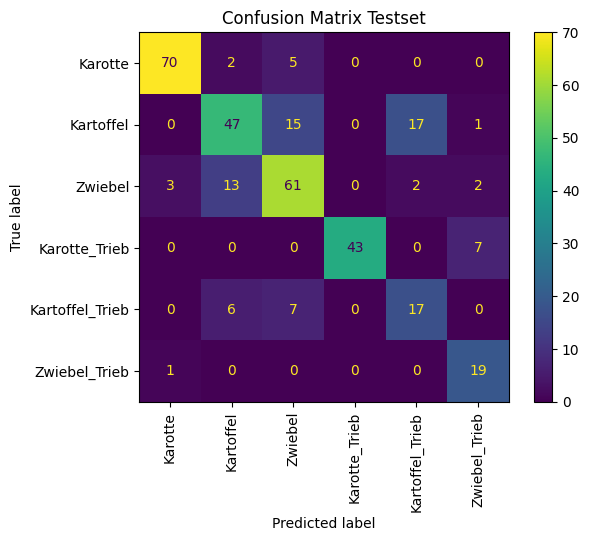

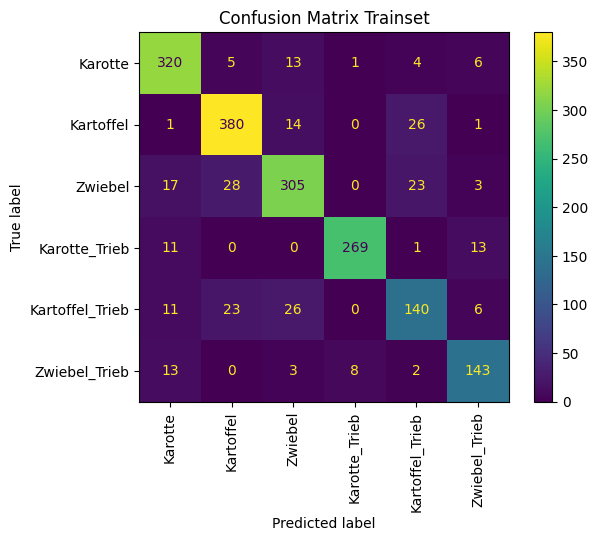

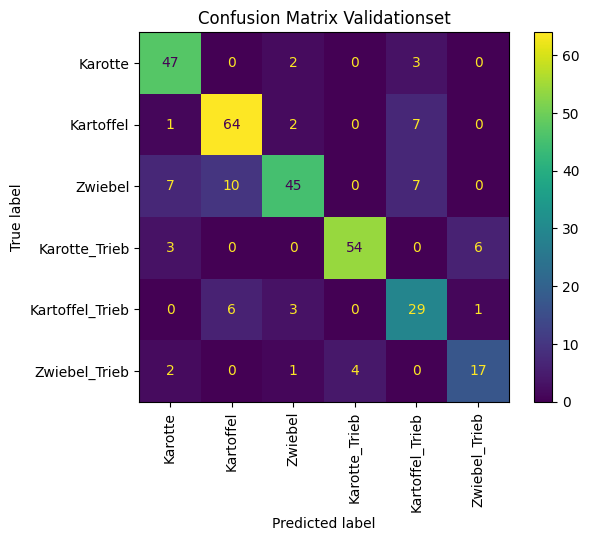

In [118]:
clf_tree_lib = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10)
clf_tree_lib.fit(X_train, y_train)
pred_train = clf_tree_lib.predict(X_train)
pred_val = clf_tree_lib.predict(X_val)
pred_test = clf_tree_lib.predict(X_test)

accuracy_test = accuracy_score(y_test.to_numpy(), pred_test)
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_val = accuracy_score(y_val, pred_val)
print(f"Model Sklearn Accuracy Testset: {accuracy_test} %\nModel Accuracy Trainset: {accuracy_train} %\nModel Accuracy Validationset: {accuracy_val} %\n")

evaluate_model(clf_tree_lib, y_test.to_numpy(), pred_test, X_test, "Testset", "sklearn")
evaluate_model(clf_tree_lib, y_train, pred_train, X_train, "Trainset", "sklearn")
evaluate_model(clf_tree_lib, y_val, pred_val, X_val, "Validationset", "sklearn")

In [119]:
_ = tree.export_text(clf_tree_lib)
print(_)
"""
fig = plt.figure()
_ = tree.plot_tree(clf_tree_lib, filled=True)
plt.title("Decision tree trained on Trainset of vegi images and all features")
fig.savefig("decistion_tree_trainset.png")
"""

|--- feature_5 <= 228.50
|   |--- feature_7 <= 0.78
|   |   |--- feature_1 <= 72.50
|   |   |   |--- feature_7 <= 0.51
|   |   |   |   |--- feature_0 <= 138.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  138.50
|   |   |   |   |   |--- feature_5 <= 22.50
|   |   |   |   |   |   |--- feature_8 <= 61.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_8 >  61.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  22.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  0.51
|   |   |   |   |--- feature_9 <= 10.81
|   |   |   |   |   |--- feature_3 <= 77.50
|   |   |   |   |   |   |--- feature_0 <= 112.50
|   |   |   |   |   |   |   |--- feature_9 <= 8.07
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- feature_9 >  8.07
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_0 >  112.50
|   |   |   |   |   |   |   |--- class: 2
|   | 

'\nfig = plt.figure()\n_ = tree.plot_tree(clf_tree_lib, filled=True)\nplt.title("Decision tree trained on Trainset of vegi images and all features")\nfig.savefig("decistion_tree_trainset.png")\n'

Model Accuracy Trainset: 0.3167992512868507 %
Model Sklearn Accuracy Testset: 0.363905325443787 %




Classifications for Kartoffel: tp= 0 | fn= 0 | fp= 80 | tn= 258

KARTOFFEL
Evaluation scores for Testset
Accuracy= 0.76 %
Precission= 0.0 %
Recall= nan %
F1-Score= nan %

---------
Classifications for Karotte: tp= 73 | fn= 184 | fp= 4 | tn= 77

KAROTTE
Evaluation scores for Testset
Accuracy= 0.44 %
Precission= 0.95 %
Recall= 0.28 %
F1-Score= 0.43 %

-------
Classifications for Zwiebel: tp= 0 | fn= 0 | fp= 81 | tn= 257

ZWIEBEL
Evaluation scores for Testset
Accuracy= 0.76 %
Precission= 0.0 %
Recall= nan %
F1-Score= nan %

-------
Classifications for Karotte_Trieb: tp= 50 | fn= 31 | fp= 0 | tn= 257

KAROTTE_TRIEB
Evaluation scores for Testset
Accuracy= 0.91 %
Precission= 1.0 %
Recall= 0.62 %
F1-Score= 0.77 %

-------------
Classifications for Kartoffel_Trieb: tp= 0 | fn= 0 | fp= 30 | tn= 308

KARTOFFEL_TRIEB
Evaluation scores for Testset
Accuracy= 0.91 %
Precission= 0.0 %
Recall= nan %
F

C:\Users\Leon\AppData\Local\Temp\ipykernel_6016\488255442.py:13: RuntimeWarning: invalid value encountered in scalar divide
  rec = round(tp / (tp + fn), 2)
C:\Users\Leon\AppData\Local\Temp\ipykernel_6016\488255442.py:13: RuntimeWarning: invalid value encountered in scalar divide
  rec = round(tp / (tp + fn), 2)


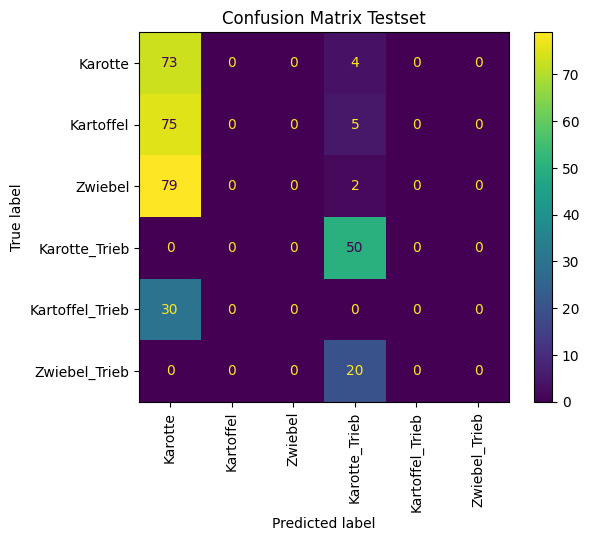

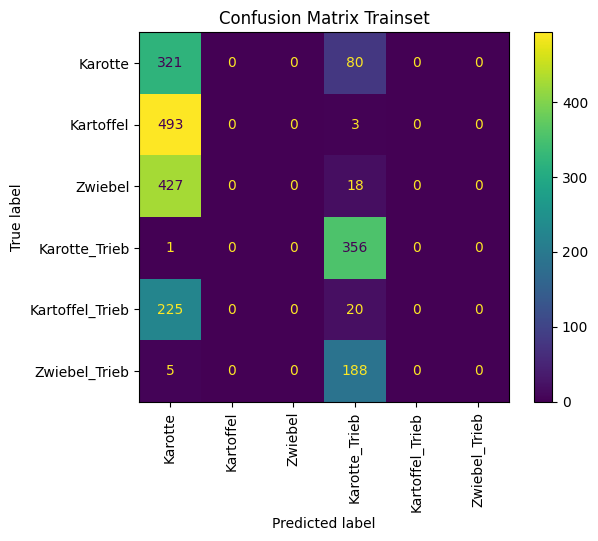

In [120]:
vegis_test_tree = vegis_test.copy()
vegis_train_tree = vegis_train.copy()
X_test_Dtree = vegis_test_tree.iloc[:, :].to_numpy().tolist()
X_train_Dtree = vegis_train_tree.iloc[:, :].to_numpy().tolist()
y_train_Dtree = vegis_train_tree.iloc[:, 10].to_numpy()

decission_tree_own = DecissionTree(25, 1)

decission_tree_own.fit(X_train_Dtree)

pred_train = decission_tree_own.predict(X_train_Dtree)
pred_test = decission_tree_own.predict(X_test_Dtree)

accuracy_test = accuracy_score(y_test.to_numpy(), pred_test)
accuracy_train = accuracy_score(y_train_Dtree, pred_train)

print(f"Model Accuracy Trainset: {accuracy_train} %\nModel Sklearn Accuracy Testset: {accuracy_test} %\n")

evaluate_model(decission_tree_own, y_test.to_numpy(), pred_test, X_test_Dtree, "Testset", "own")
evaluate_model(decission_tree_own, y_train_Dtree, pred_train, X_train_Dtree, "Trainset", "own")

In [121]:
print(decission_tree_own.tree)

{'feature_idx': 5, 'thresh': 0.0, 'left': {'feature_idx': 1, 'thresh': 80.0, 'left': {'feature_idx': 0, 'thresh': 131.0, 'left': {'feature_idx': 9, 'thresh': 5.755652131778853, 'left': {'feature_idx': 8, 'thresh': 56.0, 'left': {'feature_idx': 6, 'thresh': 0.0052003816793893, 'left': {'feature_idx': 0, 'thresh': 131.0, 'left': 4.0, 'right': 4.0}, 'right': {'feature_idx': 7, 'thresh': 0.7209975750990543, 'left': {'feature_idx': 4, 'thresh': 49.0, 'left': {'feature_idx': 9, 'thresh': 5.291746491735632, 'left': {'feature_idx': 0, 'thresh': 126.0, 'left': {'feature_idx': 2, 'thresh': 117.0, 'left': {'feature_idx': 8, 'thresh': 44.0, 'left': {'feature_idx': 0, 'thresh': 126.0, 'left': 2.0, 'right': 2.0}, 'right': 4.0}, 'right': 0.0}, 'right': 0.0}, 'right': {'feature_idx': 0, 'thresh': 88.0, 'left': 4.0, 'right': {'feature_idx': 0, 'thresh': 90.0, 'left': 4.0, 'right': {'feature_idx': 0, 'thresh': 105.0, 'left': 4.0, 'right': 4.0}}}}, 'right': {'feature_idx': 4, 'thresh': 50.0, 'left': 4.0,

Die Performance des selbstprogrammierten Decission Trees ist sehr schlecht. Nachfolgend wird ein schneller Test mit dem Iris set durchgeführt. Auf dem Iris Set erreicht der Decission Tree eine Accuracy von 0.85 %. Das ist zwar immer noch nicht herausragend, aber der CART Algorithmus funktioniert prinzipiell. 

In [122]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
df_iris = pd.DataFrame(X)
df_iris['Label'] = y
df = df_iris.copy()
X, y = df.iloc[:,:].to_numpy(), df_iris.iloc[:,4].to_numpy()

decission_tree_test_with_iris = DecissionTree(15, 1)
decission_tree_test_with_iris.fit(X)
pred = decission_tree_test_with_iris.predict(X)
accuracy_train = accuracy_score(y, pred)
print("Accuracy on Iris set: ", round(accuracy_train, 2), "%")

Accuracy on Iris set:  0.85 %


***K-Neighrest Neighbours:***
- Parameter:
    - estimators= 3

- Evaluierung:
    - Accuracy Gesamt = 0.775 % auf die Testdaten (Eigenes und Sklearn)
    
- Trainingsdatensatz:
    - Features = Alle
    - Anzahl Datenpunkte = 2137

- Testdatensatz
    - Features = Alle
    - Anzahl Datenpunkte = 338


In [123]:
train_data= pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/vegis_traindata.csv")
train_data=train_data.drop(columns=["Unnamed: 0","green pixels"])


train_data.loc[train_data["Label"]=="Karotte","Label"]=0
train_data.loc[train_data["Label"]=="Kartoffel","Label"]=1
train_data.loc[train_data["Label"]=="Zwiebel","Label"]=2
train_data.loc[train_data["Label"]=="Karotte_Trieb","Label"]=3
train_data.loc[train_data["Label"]=="Kartoffel_Trieb","Label"]=4
train_data.loc[train_data["Label"]=="Zwiebel_Trieb","Label"]=5

train_data["Label"]=train_data["Label"].astype("int")
train_data.head()

X_train_knn = train_data.iloc[:,0:10]
y_train_knn = train_data.iloc[:,10]


In [124]:
test_data= pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/TESTDATA_vegis_testdata.csv")

test_data = test_data.drop(columns=["Unnamed: 0","green pixels"])

test_data.loc[test_data["Label"]=="Karotte","Label"]=0
test_data.loc[test_data["Label"]=="Kartoffel","Label"]=1
test_data.loc[test_data["Label"]=="Zwiebel","Label"]=2
test_data.loc[test_data["Label"]=="Karotte_Trieb","Label"]=3
test_data.loc[test_data["Label"]=="Kartoffel_Trieb","Label"]=4
test_data.loc[test_data["Label"]=="Zwiebel_Trieb","Label"]=5

test_data["Label"]=test_data["Label"].astype("int")
test_data.head()

X_test_knn = test_data.iloc[:,0:10]
y_test_knn = test_data.iloc[:,10]

In [125]:
class KNN:
    def __init__(self,n_estimators=1):
        self.n_estimators = n_estimators
        
    def fit(self,X_train, y_train):
        self.X_data = X_train.to_numpy()
        self.y_data = y_train.to_numpy()

    def predict(self, X):
        X=X.to_numpy()

        Klasse=[]
        for i in X:
            eu_dist=[]
            for j in self.X_data:
                eu_dist.append(np.linalg.norm(j-i))
            dist=eu_dist.copy()
            dist.sort()
            choices=[]
            for i in range(0,self.n_estimators):
                choice_index=eu_dist.index(dist[i])
                choices.append(self.y_data[choice_index])
            #print("choises: ", choices)
            Klasse.append(np.bincount(choices).argmax()) #wahrscheinlichste Klasse auslesen und in die Klassen schreiben

        return Klasse 

Model Accuracy Trainset: 0.9050070191857744 %
Model Accuracy Testset: 0.7751479289940828 %




Classifications for Kartoffel: tp= 449 | fn= 49 | fp= 47 | tn= 1592

KARTOFFEL
Evaluation scores for Trainset
Accuracy= 0.96 %
Precission= 0.91 %
Recall= 0.9 %
F1-Score= 0.9 %

---------
Classifications for Karotte: tp= 376 | fn= 30 | fp= 25 | tn= 1706

KAROTTE
Evaluation scores for Trainset
Accuracy= 0.97 %
Precission= 0.94 %
Recall= 0.93 %
F1-Score= 0.93 %

-------
Classifications for Zwiebel: tp= 402 | fn= 41 | fp= 43 | tn= 1651

ZWIEBEL
Evaluation scores for Trainset
Accuracy= 0.96 %
Precission= 0.9 %
Recall= 0.91 %
F1-Score= 0.9 %

-------
Classifications for Karotte_Trieb: tp= 330 | fn= 22 | fp= 27 | tn= 1758

KAROTTE_TRIEB
Evaluation scores for Trainset
Accuracy= 0.98 %
Precission= 0.92 %
Recall= 0.94 %
F1-Score= 0.93 %

-------------
Classifications for Kartoffel_Trieb: tp= 214 | fn= 38 | fp= 31 | tn= 1854

KARTOFFEL_TRIEB
Evaluation scores for Trainset
Accuracy= 0.97 %
Precission= 0.

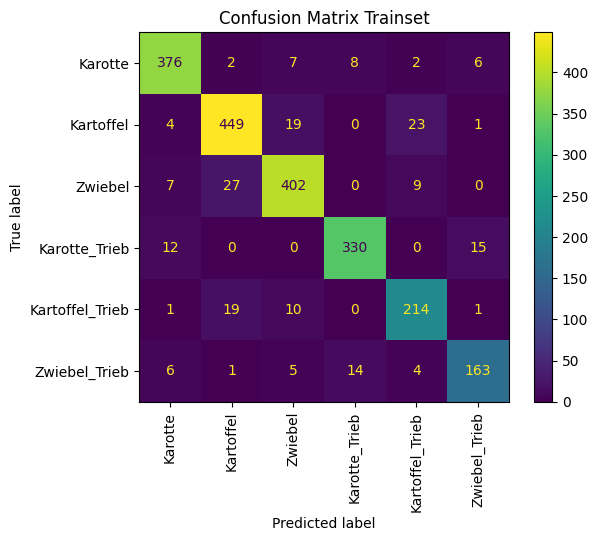

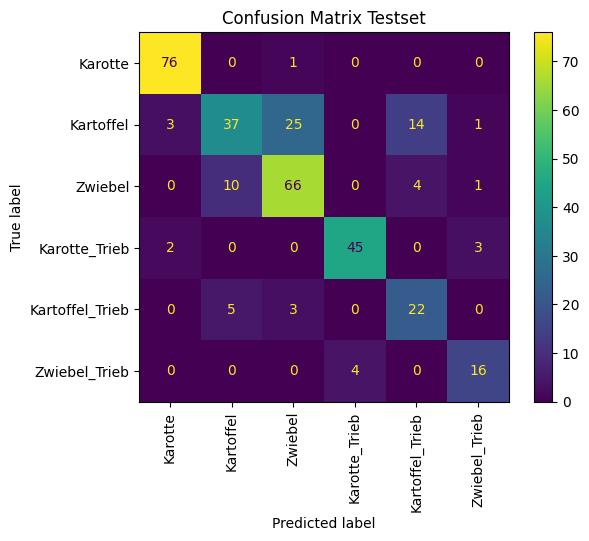

In [126]:
knn=KNN(3)
knn.fit(X_train_knn, y_train_knn)
pred_test = knn.predict(X_test_knn)
pred_train = knn.predict(X_train_knn)

accuracy_train = accuracy_score(y_train_knn, pred_train)
accuracy_test = accuracy_score(y_test_knn, pred_test)
print(f"Model Accuracy Trainset: {accuracy_train} %\nModel Accuracy Testset: {accuracy_test} %\n")

evaluate_model(knn, y_train_knn, pred_train, X_train_knn, "Trainset", "own")
evaluate_model(knn, y_test_knn.to_numpy(), pred_test, X_test_knn, "Testset", "own")

KNN von Sklearn

Model Accuracy Trainset: 0.9050070191857744 %
Model Accuracy Testset: 0.7751479289940828 %

[[376   2   7   8   2   6]
 [  4 449  19   0  23   1]
 [  7  27 402   0   9   0]
 [ 12   0   0 330   0  15]
 [  1  19  10   0 214   1]
 [  6   1   5  14   4 163]]






Classifications for Kartoffel: tp= 449 | fn= 49 | fp= 47 | tn= 1592

KARTOFFEL
Evaluation scores for Trainset
Accuracy= 0.96 %
Precission= 0.91 %
Recall= 0.9 %
F1-Score= 0.9 %

---------
Classifications for Karotte: tp= 376 | fn= 30 | fp= 25 | tn= 1706

KAROTTE
Evaluation scores for Trainset
Accuracy= 0.97 %
Precission= 0.94 %
Recall= 0.93 %
F1-Score= 0.93 %

-------
Classifications for Zwiebel: tp= 402 | fn= 41 | fp= 43 | tn= 1651

ZWIEBEL
Evaluation scores for Trainset
Accuracy= 0.96 %
Precission= 0.9 %
Recall= 0.91 %
F1-Score= 0.9 %

-------
Classifications for Karotte_Trieb: tp= 330 | fn= 22 | fp= 27 | tn= 1758

KAROTTE_TRIEB
Evaluation scores for Trainset
Accuracy= 0.98 %
Precission= 0.92 %
Recall= 0.94 %
F1-Score= 0.93 %

-

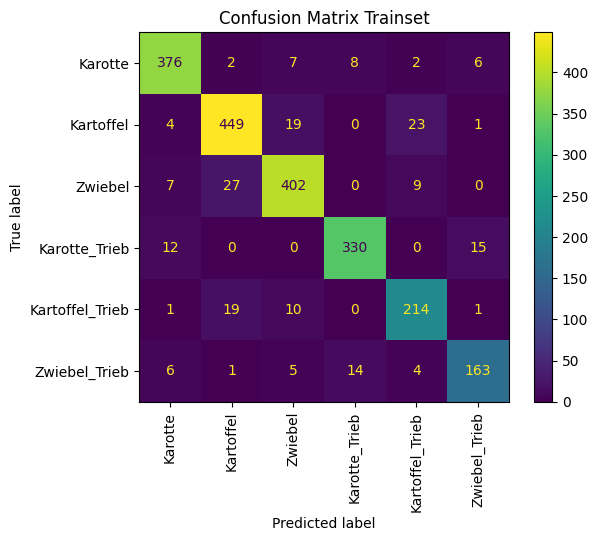

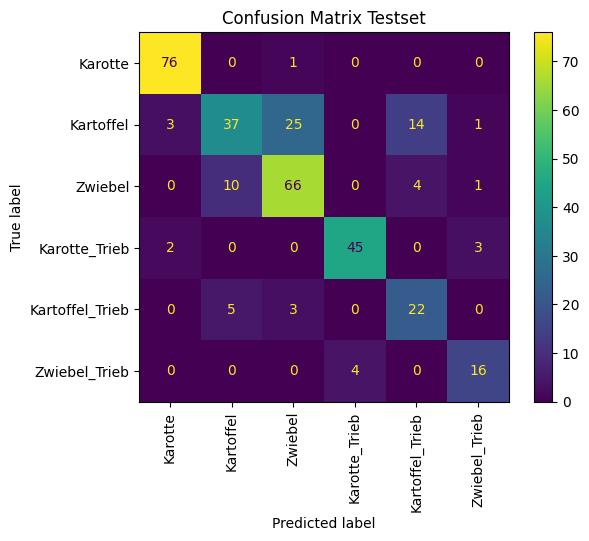

In [127]:
knn_sk = KNeighborsClassifier(n_neighbors=3,algorithm="brute")
knn_sk.fit(X_train_knn, y_train_knn)

pred_test = knn_sk.predict(X_test_knn)
pred_train = knn_sk.predict(X_train_knn)

accuracy_train = accuracy_score(y_train_knn, pred_train)
accuracy_test = accuracy_score(y_test_knn, pred_test)
print(f"Model Accuracy Trainset: {accuracy_train} %\nModel Accuracy Testset: {accuracy_test} %\n")

evaluate_model(knn_sk, y_train_knn, pred_train, X_train_knn, "Trainset", "sklearn")
evaluate_model(knn_sk, y_test_knn, pred_test, X_test_knn, "Testset", "sklearn")

Get exam test images

In [ ]:
#TODO Adapt paths to exam testdata
exam_test = pd.read_csv("G:/Meine Ablage/KI_Projekt/Testdaten/.csv")
exam_test = exam_test.drop(columns=["Unnamed: 0", "green pixels", "Image"])

exam_test = encoding_labels(exam_test, "Label", [0,1,2,3,4,5])
exam_test['Label'] = exam_test['Label'].astype('int')

X_test_e = exam_test.iloc[:, 0:10]
y_test_e = exam_test.iloc[:, 10]

print("Size testdata: ", X_test_e.shape)
print("Size label testdata: ", y_test_e.shape)
display(X_test_e.head(2))
print("")
display(y_test_e.head(2))
print("")
display(X_test_e.info())

Vorhersagen auf die Prüfungs-Testdaten mit dem Modell Logistische Regression (sklearn)

In [ ]:
pred_test_e = pipe_lg.predict(X_test_e)

accuracy_test_e = accuracy_score(y_test_e, pred_test_e)
print(f"Model Accuracy Exam Testset: {accuracy_test_e} %\n")

evaluate_model(pipe_lg, y_test_e.to_numpy(), pred_test_e, X_test_e, "Testset Exam", "sklearn")

Vorhersagen auf die Prüfungs-Testdaten mit dem Modell Logistische Regression (Selbstprogrammiert)

In [ ]:
X_test_transformed_e = poly.transform(X_test_e)
X_test_scaled_e = scaler.transform(X_test_transformed_e)
print(f"Shape transformed exam testdata: {X_test_scaled_e.shape}")

pred_test_e = lgclf_own.predict(X_test_scaled_e)

accuracy_test_e = accuracy_score(y_test_e.to_numpy(), pred_test_e)
print(f"Model Accuracy Testset: {accuracy_test_e} %\n")

evaluate_model(lgclf_own, y_test_e, pred_test_e, X_test_e, "Testset Exam", "own")

Vorhersagen auf die Prüfungs-Testdaten mit dem Modell Decission Tree (sklearn)

In [ ]:
pred_test_e = clf_tree_lib.predict(X_test_e)

accuracy_test_e = accuracy_score(y_test_e.to_numpy(), pred_test_e)
print(f"Model Sklearn Accuracy Testset: {accuracy_test_e} %\n ")

evaluate_model(clf_tree_lib, y_test_e.to_numpy(), pred_test_e, X_test_e, "Testset Exam", "sklearn")

Vorhersagen auf die Prüfungs-Testdaten mit dem Modell Decission Tree (Selbstprogrammiert)

In [ ]:
vegis_test_tree = exam_test.copy()

X_test_Dtree_e = vegis_test_tree.iloc[:, :].to_numpy().tolist()
y_test_Dtree_e = vegis_test_tree.iloc[:, 10].to_numpy()

pred_test_e = decission_tree_own.predict(X_test_Dtree_e)

accuracy_test_e = accuracy_score(y_test_Dtree_e, pred_test_e)
print(f"Model Sklearn Accuracy Exam Testset: {accuracy_test_e} %\n")

evaluate_model(decission_tree_own, y_test_Dtree_e, pred_test_e, X_test_Dtree_e, "Testset Exam", "own")

Vorhersagen auf die Prüfungs-Testdaten mit dem Modell KNN (sklearn)

In [ ]:
pred_test_e = knn_sk.predict(X_test_e)

accuracy_test_e = accuracy_score(y_test_e.to_numpy(), pred_test_e)
print(f"Model Sklearn Accuracy Testset: {accuracy_test_e} %\n ")

evaluate_model(knn_sk, y_test_e.to_numpy(), pred_test_e, X_test_e, "Testset Exam", "sklearn")

Vorhersagen auf die Prüfungs-Testdaten mit dem Modell KNN (Selbstprogrammiert)

In [ ]:
pred_test_e = knn.predict(X_test_e)

accuracy_test_e = accuracy_score(y_test_e.to_numpy(), pred_test_e)
print(f"Model Accuracy Exam Testset: {accuracy_test_e} %\n")

evaluate_model(knn, y_test_e.to_numpy(), pred_test_e, X_test_e, "Testset Exam", "own")